In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from statsmodels import regression
import statsmodels.api as sm
import xlsxwriter
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import scipy.stats as stats



In [2]:
import pandas as pd
import sqlite3

# Read the Excel file into a DataFrame
database = pd.read_excel("Daily_Currency_Prices.xlsx", index_col=0, skiprows=0)

# Establish a connection to the SQL database
connection = sqlite3.connect("Currencies_Database_Test.db")

# Create a new table in the database and insert the DataFrame data into it
database.to_sql("Daily_Currency_Prices", connection, if_exists="replace")

# Close the database connection
connection.close()
database = pd.read_excel("Daily_Currency_Prices.xlsx",index_col=0,skiprows=0)

In [3]:
import sqlite3

# Establish a connection to the SQL database
connection = sqlite3.connect("Currencies_Database_Test.db")

# Query to retrieve data from the database
query = "SELECT * FROM Daily_Currency_Prices"

# Read the SQL query into a DataFrame, setting the first column as dates and excluding it from columns
data = pd.read_sql_query(query, connection, parse_dates=['Date'], index_col='Date')



# Close the database connection
connection.close()


In [4]:
data.tail(10)

,JPY=,AUD=,NZD=,EUR=,GBP=,CAD=,CHF=,TWD=,CNY=,INR=,...,HKD=,PHP=,SGD=,THB=,KRW=,IDR=,MYR=,VND=,TRY=,KHR=
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-17,0.007437,0.6700,0.6180,1.0926,1.2374,0.746714,1.112966,0.032749,0.145378,0.012198,...,0.127402,0.017883,0.749625,0.028994,0.000758,0.000068,0.226296,0.000043,0.051583,0.000247
2023-04-18,0.007458,0.6722,0.6207,1.0971,1.2424,0.746993,1.116071,0.032804,0.145444,0.012183,...,0.127390,0.017809,0.750469,0.029172,0.000758,0.000067,0.225632,0.000043,0.051584,0.000247
2023-04-19,0.007424,0.6713,0.6198,1.0954,1.2438,0.742942,1.114330,0.032704,0.145243,0.012156,...,0.127395,0.017730,0.749457,0.029036,0.000752,0.000067,0.225225,0.000043,0.051585,0.000246
2023-04-20,0.007450,0.6740,0.6170,1.0967,1.2443,0.742170,1.120951,0.032770,0.145507,0.012177,...,0.127395,0.017895,0.750751,0.029129,0.000756,0.000067,0.225479,0.000043,0.051544,0.000246
2023-04-21,0.007454,0.6690,0.6133,1.0987,1.2430,0.738607,1.120323,0.032653,0.145096,0.012191,...,0.127429,0.017895,0.749457,0.029112,0.000752,0.000067,0.225479,0.000043,0.051615,0.000246
2023-04-24,0.007450,0.6696,0.6166,1.1041,1.2482,0.738607,1.127015,0.032629,0.145016,0.012203,...,0.127403,0.017969,0.749963,0.029121,0.000750,0.000067,0.225479,0.000043,0.051517,0.000245
2023-04-25,0.007479,0.6625,0.6136,1.0972,1.2408,0.733945,1.121453,0.032565,0.144252,0.012200,...,0.127395,0.018012,0.747049,0.029070,0.000746,0.000067,0.225073,0.000043,0.051481,0.000245
2023-04-26,0.007482,0.6598,0.6116,1.1040,1.2467,0.733407,1.122209,0.032553,0.144381,0.012234,...,0.127398,0.017966,0.748839,0.029291,0.000747,0.000067,0.224467,0.000043,0.051554,0.000244
2023-04-27,0.007466,0.6629,0.6147,1.1027,1.2487,0.735781,1.118443,0.032575,0.144467,0.012241,...,0.127397,0.017950,0.749400,0.029291,0.000747,0.000068,0.224215,0.000043,0.051456,0.000244


In [5]:
data.describe()

,JPY=,AUD=,NZD=,EUR=,GBP=,CAD=,CHF=,TWD=,CNY=,INR=,...,HKD=,PHP=,SGD=,THB=,KRW=,IDR=,MYR=,VND=,TRY=,KHR=
count,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,...,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000
mean,0.009003,0.768279,0.707633,1.165312,1.383935,0.800719,1.049691,0.033110,0.152592,0.014721,...,0.128430,0.020549,0.743939,0.030528,0.000874,0.000075,0.254435,0.000044,0.260374,0.000248
std,0.000783,0.092921,0.069167,0.095239,0.143248,0.073630,0.041224,0.001436,0.007304,0.001447,...,0.000621,0.001683,0.029053,0.001711,0.000054,0.000009,0.030667,0.000002,0.148880,0.000002
min,0.006660,0.574100,0.556300,0.959200,1.068400,0.686059,0.970591,0.029660,0.136958,0.012046,...,0.127390,0.016926,0.685307,0.026123,0.000692,0.000060,0.210704,0.000040,0.051420,0.000242
25%,0.008687,0.709400,0.659900,1.101600,1.279300,0.753196,1.013582,0.032278,0.145618,0.013582,...,0.127818,0.019314,0.725426,0.029123,0.000843,0.000070,0.235967,0.000043,0.136109,0.000246
50%,0.009090,0.745100,0.694550,1.136100,1.337350,0.774773,1.041016,0.033072,0.152672,0.014744,...,0.128773,0.020093,0.737790,0.030604,0.000882,0.000072,0.241779,0.000044,0.257053,0.000247
75%,0.009455,0.782775,0.732275,1.210350,1.514150,0.805964,1.084217,0.033793,0.159684,0.015660,...,0.128969,0.021905,0.753963,0.031867,0.000907,0.000076,0.261397,0.000046,0.360338,0.000249
max,0.011538,1.059500,0.882000,1.393300,1.716300,1.017294,1.166589,0.036353,0.165557,0.018861,...,0.129046,0.024691,0.819605,0.034977,0.000991,0.000104,0.337610,0.000048,0.572967,0.000259


In [6]:
#Put the data into a dataframe  ###DATAFRAME USED TO ACCELERATE THE ANALITICS
df_data=pd.DataFrame(data)
df_data

,JPY=,AUD=,NZD=,EUR=,GBP=,CAD=,CHF=,TWD=,CNY=,INR=,...,HKD=,PHP=,SGD=,THB=,KRW=,IDR=,MYR=,VND=,TRY=,KHR=
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.011538,1.0395,0.8274,1.3204,1.6243,1.007252,1.092180,0.034429,0.160511,0.018288,...,0.129029,0.024390,0.818934,0.032701,0.000941,0.000104,0.327118,0.000048,0.561230,0.000250
2013-01-02,0.011450,1.0503,0.8340,1.3184,1.6255,1.015435,1.089799,0.034489,0.160511,0.018440,...,0.129024,0.024480,0.819605,0.032938,0.000940,0.000104,0.329598,0.000048,0.562841,0.000250
2013-01-03,0.011464,1.0464,0.8278,1.3046,1.6106,1.012453,1.079331,0.034513,0.160511,0.018352,...,0.129024,0.024570,0.815860,0.032960,0.000941,0.000104,0.330033,0.000048,0.560538,0.000250
2013-01-04,0.011348,1.0478,0.8313,1.3067,1.6071,1.013171,1.082017,0.034468,0.160506,0.018205,...,0.129034,0.024498,0.815195,0.032830,0.000941,0.000104,0.328181,0.000048,0.561861,0.000250
2013-01-07,0.011393,1.0502,0.8369,1.3115,1.6112,1.014713,1.085776,0.034483,0.160529,0.018113,...,0.129021,0.024456,0.813802,0.032852,0.000941,0.000104,0.328785,0.000048,0.562493,0.000250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24,0.007450,0.6696,0.6166,1.1041,1.2482,0.738607,1.127015,0.032629,0.145016,0.012203,...,0.127403,0.017969,0.749963,0.029121,0.000750,0.000067,0.225479,0.000043,0.051517,0.000245
2023-04-25,0.007479,0.6625,0.6136,1.0972,1.2408,0.733945,1.121453,0.032565,0.144252,0.012200,...,0.127395,0.018012,0.747049,0.029070,0.000746,0.000067,0.225073,0.000043,0.051481,0.000245
2023-04-26,0.007482,0.6598,0.6116,1.1040,1.2467,0.733407,1.122209,0.032553,0.144381,0.012234,...,0.127398,0.017966,0.748839,0.029291,0.000747,0.000067,0.224467,0.000043,0.051554,0.000244


In [7]:
# Plot and save individual time series
for col in df_data.iteritems():
    print('plotting '+col[0])
    
    # create a new figure and axis
    fig, ax = plt.subplots()
    
    # extract the column data and plot it
    indicator = df_data[col[0]]
    ax.plot(indicator, alpha=0.9, color='#009ACD')
    
    # add x and y axis labels and a title
    ax.set_xlabel('Date')
    ax.set_ylabel(col[0])
    ax.set_title('Historic Prices: ' + col[0])
    
    # save the plot to a file and close the figure
    plt.savefig('Historic_price_'+col[0]+'.png')
    plt.close()

plotting JPY=
plotting AUD=
plotting NZD=
plotting EUR=
plotting GBP=
plotting CAD=
plotting CHF=
plotting TWD=
plotting CNY=
plotting INR=
plotting RUB=
plotting HKD=
plotting PHP=
plotting SGD=
plotting THB=
plotting KRW=
plotting IDR=
plotting MYR=
plotting VND=
plotting TRY=
plotting KHR=


In [8]:
## Data on the 16th and 17th April 2014 was considered an outlier and an adjustment was made. Instead of making values=0,
#the average between the two values surrounding these days (15-04-2014 and 18-04-2014) was put instead of the original values

print('Before Adjustment',df_data['KHR='][336:338])
data['KHR='][336:338] = 0.000253
print('-------------')
print('After Adjustment',df_data['KHR='][336:338])


Before Adjustment Date
2014-04-16    0.000259
2014-04-17    0.000258
Name: KHR=, dtype: float64
-------------
After Adjustment Date
2014-04-16    0.000253
2014-04-17    0.000253
Name: KHR=, dtype: float64


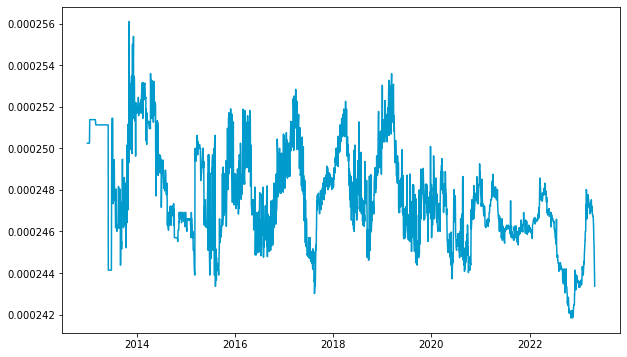

In [9]:
# plot one series
plt.figure(figsize=(10, 6))
plt.plot(df_data['KHR='],color='#009ACD')
plt.savefig('plot_normalized.png')
plt.show()



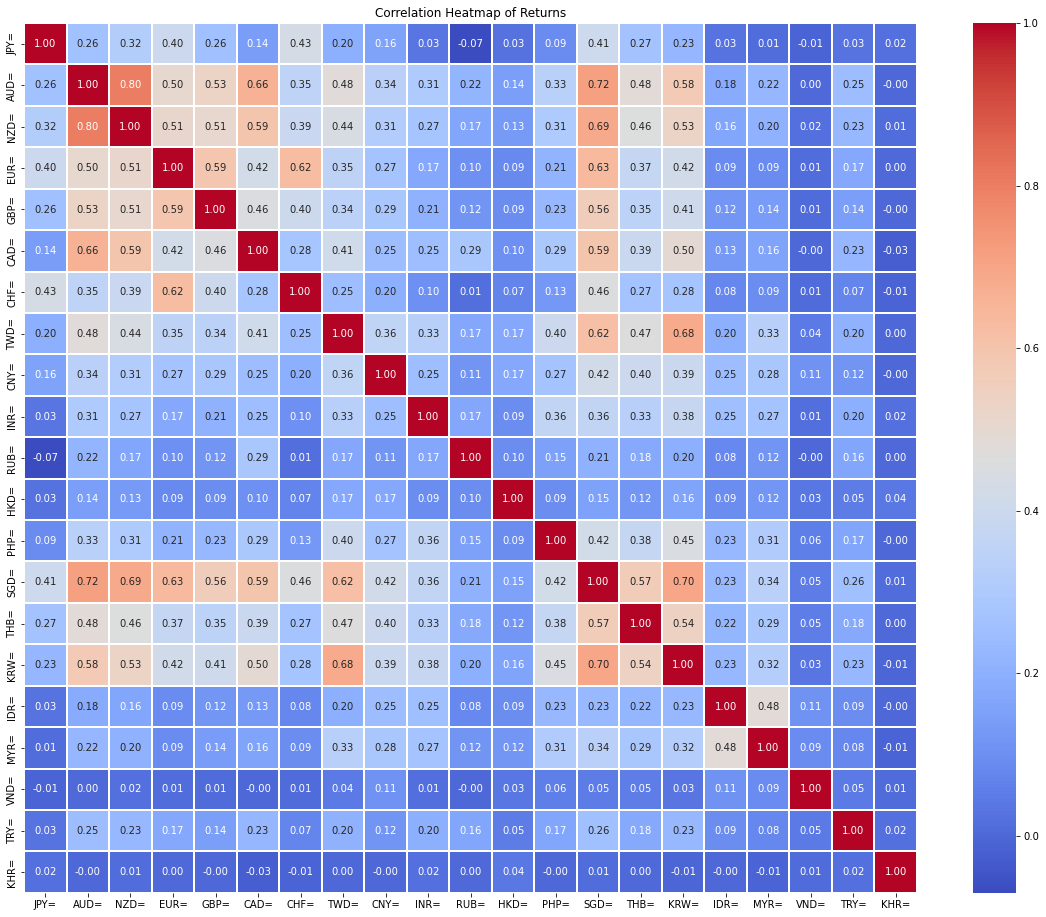

In [10]:
################################################ RETURN CALCULATION ########################################################

returns = {}
for col in df_data.columns:
    log_returns = np.log(df_data[col] / df_data[col].shift(1)).dropna()
    returns[col] = log_returns
##########################################################################################3
returns_df = pd.DataFrame(returns)
correlation_matrix = returns_df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1.5)
plt.title("Correlation Heatmap of Returns")
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

In [11]:
import pandas as pd

# Create a DataFrame from the returns dictionary
returns_df = pd.DataFrame(returns)

# Calculate the correlation coefficients
correlation_matrix = returns_df.corr()

# Display the correlation coefficients
print(correlation_matrix)

df_correlation=pd.DataFrame(correlation_matrix)
df_correlation.to_excel('Correlation Matrix.xlsx', index=False)


          JPY=      AUD=      NZD=      EUR=      GBP=      CAD=      CHF=  \
JPY=  1.000000  0.261353  0.315451  0.396237  0.257250  0.139041  0.432370   
AUD=  0.261353  1.000000  0.800410  0.503640  0.531277  0.662600  0.353361   
NZD=  0.315451  0.800410  1.000000  0.513849  0.509455  0.594621  0.386105   
EUR=  0.396237  0.503640  0.513849  1.000000  0.590597  0.420318  0.624244   
GBP=  0.257250  0.531277  0.509455  0.590597  1.000000  0.455058  0.399180   
CAD=  0.139041  0.662600  0.594621  0.420318  0.455058  1.000000  0.280101   
CHF=  0.432370  0.353361  0.386105  0.624244  0.399180  0.280101  1.000000   
TWD=  0.195275  0.480206  0.443923  0.350579  0.339808  0.412902  0.250407   
CNY=  0.155664  0.336626  0.310208  0.270213  0.286411  0.245108  0.197689   
INR=  0.033298  0.305829  0.274313  0.173964  0.207695  0.250825  0.104522   
RUB= -0.070303  0.217641  0.165701  0.102688  0.115179  0.288944  0.014350   
HKD=  0.025383  0.143538  0.132420  0.088570  0.093914  0.104288

In [12]:
import pandas as pd
import sqlite3

# Read the Excel file into a DataFrame
database = pd.read_excel("Correlation Matrix.xlsx", index_col=0, skiprows=0)

# Establish a connection to the SQL database
connection = sqlite3.connect("Currencies_Database_Test.db")

# Create a new table in the database and insert the DataFrame data into it
database.to_sql("Correlation Matrix", connection, if_exists="replace")

# Close the database connection
connection.close()
database = pd.read_excel("Correlation Matrix.xlsx",index_col=0,skiprows=0)

In [13]:
for col, returns_series in returns.items():
    std_dev = returns_series.std()*100
    print(f"Standard Deviation of {col}: {std_dev}")

Standard Deviation of JPY=: 0.5751617000661801
Standard Deviation of AUD=: 0.6379608996249542
Standard Deviation of NZD=: 0.6575732472734734
Standard Deviation of EUR=: 0.4951241491340232
Standard Deviation of GBP=: 0.5867744245076816
Standard Deviation of CAD=: 0.46637472203128794
Standard Deviation of CHF=: 0.5965553569438323
Standard Deviation of TWD=: 0.29054063460862034
Standard Deviation of CNY=: 0.23577651192003404
Standard Deviation of INR=: 0.3994093353608701
Standard Deviation of RUB=: 1.4947767939490015
Standard Deviation of HKD=: 0.036357731178894834
Standard Deviation of PHP=: 0.3156227997880384
Standard Deviation of SGD=: 0.30306993842584884
Standard Deviation of THB=: 0.3390080299319326
Standard Deviation of KRW=: 0.5193025127572496
Standard Deviation of IDR=: 0.3921792558989963
Standard Deviation of MYR=: 0.38415150642679685
Standard Deviation of VND=: 0.13294356488911258
Standard Deviation of TRY=: 1.1015859416565514
Standard Deviation of KHR=: 0.3705836326381914


In [ ]:
################################################# QQ PLOTS (FOR RETURNS) ################################################################
for col, ret in returns.items():
    sm.qqplot(ret, line='s')
    plt.title(col + ' QQ Plot')
    plt.savefig(col + '_returns_qqplot.png')
    plt.close()
    plt.show()

In [ ]:
################################################ HISTOGRAM (FOR RETURNS) #####################################################

for col, ret in returns.items():
    plt.hist(ret, bins=30,color="#6C9AEC")
    plt.title(col + ' Returns Histogram')
    plt.xlabel('Returns')
    plt.ylabel('Frequency')
    plt.savefig(col + '_returns_hist.png')
    plt.close()
    #plt.show()

In [ ]:
############################################ BOXPLOTS (RETURNS) ###########################################################

#Create data frame returns
df_returns=pd.DataFrame(returns)

# Make boxplot for each column of the data frame
for col in df_returns.columns:
    sns.boxplot(data=df_returns[col], color='#6C9AEC')
    plt.title(col)
    plt.savefig(col + '_boxplot.png')
    plt.close()
    #plt.show()

In [ ]:
# Shapiro Wilk Test for each currency return
for col, ret in returns.items():
    stat, p = shapiro(ret)
    print('Shapiro-Wilk normality test for ' + col + ' returns:')
    print('Statistics=%.3f, p-value=%.7f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [ ]:
#   From the shapiro test we can conclude that the returns are not normally distributed

In [ ]:
############################################# STATIONARITY TEST ###########################################################

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Testing stationarity in level
for column in df_data.columns:
    print("Column:", column)
    for lag in range(1, 3):
        print("Number of lags used:", lag)
        adf_level = adfuller(df_data[column], maxlag=lag, regression='n', autolag=None)
        adf_level_statistic = adf_level[0]
        adf_level_pvalue = adf_level[1]
        print("ADF Test Statistic (Level):", adf_level_statistic)
        print("p-value (Level):", adf_level_pvalue)
        print()

# Testing stationarity in first difference
for column in df_data.columns:
    print("Column:", column)
    for lag in range(1, 3):
        print("Number of lags used:", lag)
        df_diff = df_data[column].diff().dropna()  # Compute the first difference
        adf_diff = adfuller(df_diff, maxlag=lag, regression='n', autolag=None)
        adf_diff_statistic = adf_diff[0]
        adf_diff_pvalue = adf_diff[1]
        print("ADF Test Statistic (First Difference):", adf_diff_statistic)
        print("p-value (First Difference):", adf_diff_pvalue)
        print()



In [ ]:
###### AQM METHOD ######
import numpy as np
from statsmodels.tsa.stattools import adfuller

var_list = df_data.columns

for lags in range(1, 3):
    print('Number of lags used:', lags)
    print('ADF P-Val for Prices (Level)')
    for i in var_list:
        adf_library = adfuller(df_data[i], maxlag=lags, regression='n', autolag=None)
        adf_library_d = adfuller(np.diff(df_data[i]), maxlag=lags, regression='n', autolag=None)

        print(i, ':', "%.12f" % adf_library[1])
    print('____________________________________________', '\n')


In [ ]:
import numpy as np
from statsmodels.tsa.stattools import adfuller
import sqlite3

# Establish a connection to the SQLite database
connection = sqlite3.connect("Currencies_Database_Test.db")

# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Drop the existing table if it exists
cursor.execute("DROP TABLE IF EXISTS adf_results")

# Create a new table to store the results
cursor.execute('''CREATE TABLE adf_results (
                    Currency_Asset TEXT,
                    lags INTEGER,
                    p_value REAL
                )''')

var_list = df_data.columns

for lags in range(1, 3):
    print('Number of lags used:', lags)
    print('ADF P-Val for Prices (Level)')
    for i in var_list:
        adf_library = adfuller(df_data[i], maxlag=lags, regression='n', autolag=None)
        adf_library_d = adfuller(np.diff(df_data[i]), maxlag=lags, regression='n', autolag=None)

        print(i, ':', "%.12f" % adf_library[1])

        # Insert the result into the database
        sql = "INSERT INTO adf_results (Currency_Asset, lags, p_value) VALUES (?, ?, ?)"
        values = (i, lags, adf_library[1])
        cursor.execute(sql, values)

    print('____________________________________________', '\n')

# Commit the changes to the database and close the connection
connection.commit()
cursor.close()
connection.close()

The results indicate some currencies are stationary and some are not

In [ ]:
################################################## DATA TRANSFORMATION ###################################################
#### List of non-stationary currencies
non_stationary_currencies = ['NZD', 'EUR', 'GBP', 'CHF', 'TWD', 'CNY', 'HKD', 'SGD', 'THB', 'KRW', 'KHR']

# Create a copy of df_data
df_data_copy = df_data.copy()

# Iterate over the non-stationary currencies
for currency in non_stationary_currencies:
    # Perform the first difference on the copy
    df_data_copy[f"{currency}_diff"] = df_data_copy[currency].diff()
    
# Drop the rows with NaN values resulting from differencing in the copy
df_data_copy.dropna(inplace=True)

df_data_copy

In [ ]:
# List of columns to drop
columns_to_drop = ['NZD', 'EUR', 'GBP', 'CHF', 'TWD', 'CNY', 'HKD', 'SGD', 'THB', 'KRW', 'KHR']

# Create a new DataFrame with the dropped columns
df_transformed = df_data_copy.drop(columns=columns_to_drop)

print(df_transformed)  # Print the new DataFrame

# Export the new DataFrame to Excel
df_transformed.to_excel('df_transformed.xlsx', index=False)


In [ ]:
df_transformed

In [ ]:
import pandas as pd
import sqlite3

# Read the Excel file into a DataFrame
database = pd.read_excel("df_transformed.xlsx", index_col=0, skiprows=0)

# Establish a connection to the SQL database
connection = sqlite3.connect("Currencies_Database_Test.db")

# Create a new table in the database and insert the DataFrame data into it
database.to_sql("df_transformed", connection, if_exists="replace")

# Close the database connection
connection.close()
database = pd.read_excel("df_transformed.xlsx",index_col=0,skiprows=0)

In [ ]:
#################### STATIONARITY TEST TO TRANSFORMED DATA ###############################################3
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Testing stationarity in level
for column in df_transformed.columns:
    print("Column:", column)
    for lag in range(1, 3):
        print("Number of lags used:", lag)
        adf_level = adfuller(df_transformed[column], maxlag=lag, regression='n', autolag=None)
        adf_level_statistic = adf_level[0]
        adf_level_pvalue = adf_level[1]
        print("ADF Test Statistic (Level):", adf_level_statistic)
        print("p-value (Level):", adf_level_pvalue)
        print()

# Testing stationarity in first difference
for column in df_transformed.columns:
    print("Column:", column)
    for lag in range(1, 3):
        print("Number of lags used:", lag)
        df_diff = df_transformed[column].diff().dropna()  # Compute the first difference
        adf_diff = adfuller(df_diff, maxlag=lag, regression='n', autolag=None)
        adf_diff_statistic = adf_diff[0]
        adf_diff_pvalue = adf_diff[1]
        print("ADF Test Statistic (First Difference):", adf_diff_statistic)
        print("p-value (First Difference):", adf_diff_pvalue)
        print()


In [ ]:
###### AQM METHOD ######
import numpy as np
from statsmodels.tsa.stattools import adfuller

var_list = df_transformed.columns

for lags in range(1, 3):
    print('Number of lags used:', lags)
    print('ADF P-Val for Prices (Level)')
    for i in var_list:
        adf_library = adfuller(df_transformed[i], maxlag=lags, regression='n', autolag=None)
        adf_library_d = adfuller(np.diff(df_transformed[i]), maxlag=lags, regression='n', autolag=None)

        print(i, ':', "%.12f" % adf_library[1])
    print('____________________________________________', '\n')

In [ ]:
import numpy as np
from statsmodels.tsa.stattools import adfuller
import sqlite3

# Establish a connection to the SQLite database
connection = sqlite3.connect("Currencies_Database_Test.db")

# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Drop the existing table if it exists
cursor.execute("DROP TABLE IF EXISTS adf_results_stationary")

# Create a new table to store the results
cursor.execute('''CREATE TABLE adf_results_stationary (
                    Currency_Asset TEXT,
                    lags INTEGER,
                    p_value REAL
                )''')

var_list = df_data.columns

for lags in range(1, 3):
    print('Number of lags used:', lags)
    print('ADF P-Val for Prices (Level)')
    for i in var_list:
        adf_library = adfuller(df_data[i], maxlag=lags, regression='n', autolag=None)
        adf_library_d = adfuller(np.diff(df_data[i]), maxlag=lags, regression='n', autolag=None)

        print(i, ':', "%.12f" % adf_library[1])

        # Insert the result into the database
        sql = "INSERT INTO adf_results_stationary (Currency_Asset, lags, p_value) VALUES (?, ?, ?)"
        values = (i, lags, adf_library[1])
        cursor.execute(sql, values)

    print('____________________________________________', '\n')

# Commit the changes to the database and close the connection
connection.commit()
cursor.close()
connection.close()

In [ ]:
# After running the first difference we can conclude that  the variables are integrated in order (1)

In [ ]:
##################################### COINTEGRATION TEST NON-TRANSFORMED ######################################

In [ ]:
var_list = df_data.columns
var_list

In [ ]:
####### AQM COINTEGRATION NON TRANSFORMED ############

import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.vecm import coint_johansen

x_list = var_list
y_list = var_list
max_lags = 2
counter_total = 1
counter_lib_ECMLib = 1
counter_lib_ECMLib_n_Coded = 1

results = []  # List to store the results

results.append(['Asset', 'Test', 'ADF Lags', 'Cointegration Result', 'P-value', 'Cointegration Score', 'R-squared'])  # Header row

print('Number of identified cointegrations using the ECM Library by asset:')

for y_name in y_list:
    y = df_data[y_name]
    counter_lib_ECMLib_success_temp = 0
    counter_total_byasset = 0

    print('Asset:', y_name)

    for lags in range(0, max_lags+1, 1):  # Update the range to include max_lags
        for i in x_list:
            if not y_name == i:
                counter_total = counter_total + 1
                counter_total_byasset = counter_total_byasset + 1

                x_n = df_data[i]

                if y.shape > x_n.shape:
                    temp = y.drop(y.index[0])
                    y = temp
                elif y.shape < x_n.shape:
                    temp = x_n.drop(x_n.index[0])
                    d_i = temp
                if x_n.shape != y.shape:
                    print('Warning Data Problem: Y', y.shape, 'X:', x_n.shape)

                # Step 1: Stationarity Tests for the Residual between Y and other variables
                step1_myols = sm.OLS(y, x_n)
                step1_est_resid = step1_myols.fit().resid

                adf_library = sm.tsa.stattools.adfuller(step1_est_resid, maxlag=lags, regression='n', autolag=None)

                # ECM results
                ECM_results_lib = sm.tsa.stattools.coint(y, df_data[i], trend='c', maxlag=lags)

                if ECM_results_lib[1] < 0.1:  # Update the confidence level to 10% (0.1)
                    counter_lib_ECMLib = counter_lib_ECMLib + 1

                    OLS_results_lib = sm.OLS(y, x_n, hasconst=None).fit()
                    OLS_results_code = sm.OLS(y, x_n)

                    cointegration_result = 'Cointegration Identified'
                    p_value = ECM_results_lib[1]
                    cointegration_score = ECM_results_lib[0]
                    r_squared = OLS_results_lib.rsquared
                    counter_lib_ECMLib_success_temp = counter_lib_ECMLib_success_temp + 1

                else:
                    cointegration_result = 'No Cointegration'
                    p_value = '-'
                    cointegration_score = '-'
                    r_squared = '-'

                results.append([y_name, i, lags, cointegration_result, p_value, cointegration_score, r_squared])  # Add row to results list

                print('Test:', i, ', ADF Lags:', lags, ', Result:', cointegration_result)

    print('Total cointegration identified for', y_name, ':', counter_lib_ECMLib_success_temp, 'out of total',
          counter_total_byasset)

print('\n', 'total number of regressions conducted:', counter_total - 1)
print('total number of identified cointegrations using only ECM Library:', counter_lib_ECMLib - 1)
print('total number of identified cointegrations using both ECM Library and own code:', counter_lib_ECMLib_n_Coded - 1)

      # Export results to Excel
# Export results to Excel
df_results = pd.DataFrame(results[1:], columns=results[0])  # Create a DataFrame from the results list
df_results.to_excel('results_ECM.xlsx', index=False)  # Export the DataFrame to an Excel file




In [ ]:
import statsmodels.api as sm
import pandas as pd
import sqlite3

# Establish a connection to your SQLite database
conn = sqlite3.connect('Currencies_Database.db')
cursor = conn.cursor()

# Initialize lists to store the results
results = []

var_list2 = df_data.columns
df_data['Constant'] = 1

x_list2 = var_list2
y_list2 = var_list2
max_lags = 2
counter_total = 1
counter_lib_ECMLib = 1
counter_lib_ECMLib_n_Coded = 1

# Loop through each asset in the DataFrame
for y_name in y_list2:
    y = df_data[y_name]
    counter_lib_ECMLib_success_temp = 0
    counter_total_byasset = 0
    lags_success = []
    R2_success = []

    for lags in range(0, max_lags, 1):
        for i in x_list2:
            if not y_name == i:
                counter_total = counter_total + 1
                counter_total_byasset = counter_total_byasset + 1

                x_n = df_data[i]
                x = df_data[[i, 'Constant']]

                if y.shape > x_n.shape:
                    temp = y.drop(y.index[0])
                    y = temp
                elif y.shape < x_n.shape:
                    temp = x_n.drop(x_n.index[0])
                    d_i = temp
                if x_n.shape != y.shape:
                    print('Warning Data Problem: Y', y.shape, 'X:', x_n.shape)

                # Step 1: Stationarity Tests for the Residual between Y and other variables
                step1_myols = sm.OLS(y, x)
                step1_est_resid = step1_myols.fit().resid

                adf_library = sm.tsa.stattools.adfuller(step1_est_resid, maxlag=lags, regression='n', autolag=None)

                # Step 2
                d_y = y.diff()[1:]
                d_i = x_n.diff()[1:]

                d_i_res = pd.concat([x_n.diff()[1:], step1_est_resid.shift(1)[1:]], axis=1)
                d_i_res.columns = [i, 'est_res_1']

                if d_y.shape[0] != d_i_res.shape[0]:
                    print('Warning Data Problem: dY', d_y.shape[0], 'dX_res:', d_i_res.shape[0])

                ECM_results_lib = sm.tsa.stattools.coint(y, df_data[i], trend='c', maxlag=lags)

                if ECM_results_lib[1] < 0.1:
                    counter_lib_ECMLib = counter_lib_ECMLib + 1

                    OLS_results_lib = sm.OLS(d_y, d_i_res, hasconst=None).fit()
                    OLS_results_code = sm.OLS(d_y, d_i_res)

                    counter_lib_ECMLib_success_temp = counter_lib_ECMLib_success_temp + 1
                    lags_success.append(lags)
                    R2_success.append(OLS_results_lib.rsquared)

                    # Store the results in a dictionary
                    results_dict = {
                        'asset': y_name,
                        'variable': i,
                        'lags': lags,
                        'cointegration': 'Yes',
                        'R2': OLS_results_lib.rsquared
                    }
                    # Append the dictionary to the list of results
                    results.append(results_dict)
                else:
                    # Store the results in a dictionary
                    results_dict = {
                        'asset': y_name,
                        'variable': i,
                        'lags': lags,
                        'cointegration': 'No',
                        'R2': None
                    }
                    # Append the dictionary to the list of results
                    results.append(results_dict)

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results)

# Export the results to the SQL database
results_df.to_sql('Cointegration_Results_NonTransformed', conn, if_exists='replace', index=False)

# Commit the changes and close the connection to the database
conn.commit()
conn.close()

In [ ]:
################################## Engle-Granger ECM ####################################################

import pandas as pd
from statsmodels.tsa.stattools import coint
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

# Perform cointegration test with up to 2 lags
results = []
pairs = []
ols_results = []  # List to store OLS regression results
ecm_results = []  # List to store ECM results

# Iterate over all pairs of columns in df_transformed
for i in range(len(df_data.columns)):
    for j in range(i+1, len(df_data.columns)):
        col1 = df_data.iloc[:, i]
        col2 = df_data.iloc[:, j]
        
        # Perform cointegration test with up to 2 lags
        result = coint(col1, col2, maxlag=2)
        score, pvalue = result[:2]

        # Store the results and pairs
        results.append([col1.name, col2.name, score, pvalue])
        pairs.append((col1.name, col2.name))

        # Estimate the OLS regression model
        model = OLS(col1, sm.add_constant(col2)).fit()
        ols_results.append([col1.name, col2.name, model.rsquared, model.params[1], model.pvalues[1]])

        # Estimate the ECM
        error = col1 - model.params[1] * col2
        ecm_model = OLS(error, sm.add_constant(col1)).fit()
        ecm_coefficient = ecm_model.params[1]
        ecm_results.append([col1.name, col2.name, ecm_coefficient])

# Create a DataFrame for the cointegration test results
columns = ['Column 1', 'Column 2', 'Cointegration Score', 'P-value']
results_df = pd.DataFrame(results, columns=columns)

# Create a DataFrame for the OLS regression results
ols_columns = ['Column 1', 'Column 2', 'R-squared', 'Coefficient', 'P-value']
ols_results_df = pd.DataFrame(ols_results, columns=ols_columns)

# Create a DataFrame for the ECM results
ecm_columns = ['Column 1', 'Column 2', 'ECM Coefficient']
ecm_results_df = pd.DataFrame(ecm_results, columns=ecm_columns)

# Export the results to Excel
results_df.to_excel('Cointegration Test_ECM.xlsx', index=False)
ols_results_df.to_excel('OLS Regression Results.xlsx', index=False)
ecm_results_df.to_excel('ECM Results.xlsx', index=False)

print(results_df)
print(ols_results_df)
print(ecm_results_df)


In [ ]:

import pandas as pd
import sqlite3
from statsmodels.tsa.stattools import coint
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

# Perform cointegration test with up to 2 lags
results = []
pairs = []
ols_results = []  # List to store OLS regression results
ecm_results = []  # List to store ECM results

# Iterate over all pairs of columns in df_transformed
for i in range(len(df_data.columns)):
    for j in range(i + 1, len(df_data.columns)):
        col1 = df_data.iloc[:, i]
        col2 = df_data.iloc[:, j]

        # Perform cointegration test with up to 2 lags
        result = coint(col1, col2, maxlag=2)
        score, pvalue = result[:2]

        # Store the results and pairs
        results.append([col1.name, col2.name, score, pvalue])
        pairs.append((col1.name, col2.name))

        # Estimate the OLS regression model
        model = OLS(col1, sm.add_constant(col2)).fit()
        ols_results.append([col1.name, col2.name, model.rsquared, model.params[1], model.pvalues[1]])

        # Estimate the ECM
        error = col1 - model.params[1] * col2
        ecm_model = OLS(error, sm.add_constant(col1)).fit()
        ecm_coefficient = ecm_model.params[1]
        ecm_results.append([col1.name, col2.name, ecm_coefficient])

# Create a DataFrame for the cointegration test results
columns = ['Column_1', 'Column_2', 'Cointegration_Score', 'P_value']
results_df = pd.DataFrame(results, columns=columns)

# Create a DataFrame for the OLS regression results
ols_columns = ['Column_1', 'Column_2', 'R_squared', 'Coefficient', 'P_value']
ols_results_df = pd.DataFrame(ols_results, columns=ols_columns)

# Create a DataFrame for the ECM results
ecm_columns = ['Column_1', 'Column_2', 'ECM_Coefficient']
ecm_results_df = pd.DataFrame(ecm_results, columns=ecm_columns)

# Establish a connection to the SQL database
connection = sqlite3.connect('Currencies_Database_Test.db')

# Export the results to the database table 'Engle_Granger_ECM_Results'
results_df.to_sql('Engle_Granger_Cointegration_Test', connection, if_exists='replace', index=False)
ols_results_df.to_sql('Engle_Granger_OLS_Results', connection, if_exists='replace', index=False)
ecm_results_df.to_sql('Engle_Granger_ECM_Results', connection, if_exists='replace', index=False)

# Close the database connection
connection.close()

print(results_df)
print(ols_results_df)
print(ecm_results_df)

In [ ]:
############################################## CAUSALITY TEST ##########################################################

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

# Initialize an empty list to store the results
results = []

# Loop through each pair of columns in the DataFrame
for i, col1 in enumerate(df_data.columns):
    for j, col2 in enumerate(df_data.columns):
        if i == j:
            continue
        # Run the Granger causality test
        result = grangercausalitytests(df_data[[col1, col2]], maxlag=2, verbose=False)
        
        # Extract the test results for the maximum lag order
        maxlag_result = result[2][0]
        
        # Check if any test result is statistically significant (p-value < 0.05)
        significant_results = [res for res in maxlag_result.values() if res[1] < 0.05]
        
        if significant_results:
            # Get the first statistically significant test result
            test_result = significant_results[0]
            
            # Print the test results
            print(f"Granger causality test between {col1} and {col2}:")
            print(f"  Lag Order: {test_result[0]}")
            print(f"  P-value: {test_result[1]}")
            
            # Store the results in a dictionary
            results_dict = {
                'currency1': col1,
                'currency2': col2,
                'lag_order': test_result[0],
                'p_value': test_result[1]
            }
            # Append the dictionary to the list of results
            results.append(results_dict)

# Create a new DataFrame from the list of results
granger_results_df = pd.DataFrame(results)

# Export the DataFrame to an Excel file
granger_results_df.to_excel('granger_causality_results.xlsx', index=False)



In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd
import sqlite3

# Establish a connection to your SQLite database
conn = sqlite3.connect('Currencies_Database_Test.db')
cursor = conn.cursor()

# Initialize an empty list to store the results
results = []

# Loop through each pair of columns in the DataFrame
for i, col1 in enumerate(df_data.columns):
    for j, col2 in enumerate(df_data.columns):
        if i == j:
            continue
        
        # Check if either column is constant
        if df_data[col1].nunique() == 1 or df_data[col2].nunique() == 1:
            continue
        
        # Run the Granger causality test
        result = grangercausalitytests(df_data[[col1, col2]], maxlag=2, verbose=False)
        
        # Store the results in a dictionary
        results_dict = {
            'currency1': col1,
            'currency2': col2,
            'lag_order': result[2][0]['params_ftest'][0],
            'p_value': result[2][0]['params_ftest'][1]
        }
        # Append the dictionary to the list of results
        results.append(results_dict)

# Create a new DataFrame from the list of results
granger_results_df = pd.DataFrame(results)

# Create a table in the SQLite database
table_name = 'Causality_Test_Results'
granger_results_df.to_sql(table_name, conn, if_exists='replace', index=False)

# Commit the changes and close the connection
conn.commit()
conn.close()